In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(gaussian)=
# The Gaussian Distribution

## The Normal distribution

The normal (or Gaussian) distribution is a ubiquitous one.
It appears over and over again.
There are two explanations as to why it appears so often:

+ It is the distribution of maximum uncertainty that matches a known expectation and a known variance variance.
+ It is the distribution that arises when you add a lot of random variables together.

We will learn about both these in subsequent lectures.

We write:

$$
X | \mu, \sigma \sim N(\mu, \sigma^2),
$$

and we read "$X$ conditioned on $\mu$ and $\sigma^2$ follows a normal distribution with expected value $\mu$ and variance $\sigma^2$.

```{note}
First, a lot of people write $N(\mu, \sigma)$ instead of $N(\mu, \sigma^2)$.
You should always check what the author means.

Second, many people refer to $\mu$ as the mean instead of the expected value.
We will use the terms "mean" and "expected value" interchangeably when dealing with Gaussian distributions.
```

## The standard normal distribution
When we have zero mean and unit variance, we say that we have a *standard normal* distribution.
If $Z$ is a standard normal random variable, we write:

$$
Z\sim N(0,1).
$$

The PDF of the standard normal is typically denoted by $\phi(z)$ and is given by:

$$
\phi(z) = \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{z^2}{2}\right\}.
$$

The CDF of the standard normal is denoted by $\Phi(z)$ and is given by:

$$
\Phi(z) := p(Z \le z) = \int_{-\infty}^z \phi(z')dz'.
$$

The CDF of the standard normal is not available in closed form.
In the old days, we used to look it up in a table.
Nowadays, we use a computer to calculate it.

Here is how you can get the PDF of the standard normal.
First, let's make a standard normal random variable in `scipy.stats`:

In [2]:
import scipy.stats as st
Z = st.norm()

You can evaluate it anywhere you want:

In [3]:
print(f"phi(0.5) = {Z.pdf(0.5):.2f}")

phi(0.5) = 0.35


Let's plot the PDF:

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/2154087378.py:6: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("$\phi(z)$")


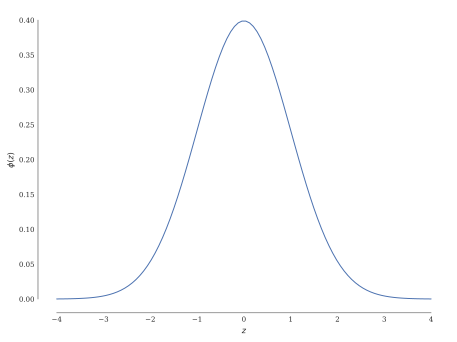

In [4]:
fig, ax = plt.subplots()
import numpy as np
zs = np.linspace(-4.0, 4.0, 100)
ax.plot(zs, Z.pdf(zs))
ax.set_xlabel("$z$")
ax.set_ylabel("$\phi(z)$")
sns.despine(trim=True);

And here is the CDF:

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/625513495.py:4: SyntaxWarning: invalid escape sequence '\P'
  ax.set_ylabel("$\Phi(z)$")


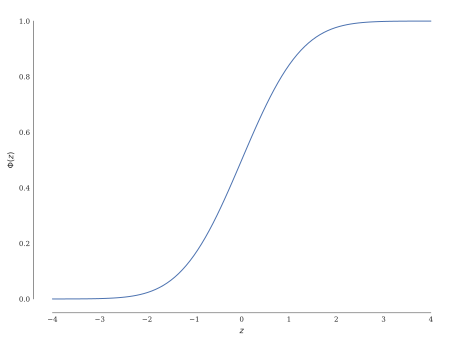

In [5]:
fig, ax = plt.subplots()
ax.plot(zs, Z.cdf(zs))
ax.set_xlabel("$z$")
ax.set_ylabel("$\Phi(z)$")
sns.despine(trim=True);

Here is the expectation:

In [6]:
print(f"E[Z] = {Z.expect():.2f}")

E[Z] = -0.00


And the variance:

In [7]:
print(f"V[Z] = {Z.var():.2f}")

V[Z] = 1.00


Here is the probability that Z is between two numbers:

In [8]:
a = 1.0
b = 3.0
prob_Z_in_ab = Z.cdf(b) - Z.cdf(a)
print(f"p({a:.2f} <= Z <= {b:.2f}) = {prob_Z_in_ab:.2f}")

p(1.00 <= Z <= 3.00) = 0.16


And here is how you can sample:

In [9]:
Z.rvs(100)

array([ 0.77396451, -1.48721031, -0.87313953, -1.18401958, -0.21754929,
        0.27586982, -1.08656157, -0.86566957,  1.55318281, -0.19342273,
       -0.78622608,  0.13478383,  1.54074117,  0.17214298,  0.27161673,
       -1.2380911 , -0.36197178, -0.78936041, -0.6815666 ,  0.92103456,
       -0.15214387,  0.03534538,  0.8393984 , -0.89000648,  0.40387164,
        0.62659767, -1.51911925, -1.18005863,  0.20033529,  1.61414491,
       -1.22993179,  0.11912838,  0.25654946,  1.10733318, -0.44513903,
        1.91009009,  0.26086856, -0.66955878,  1.98908038, -0.21763121,
       -2.2971759 ,  0.24816766,  0.201445  ,  1.28315847, -2.08099102,
       -0.56733173, -0.89095781, -0.96356551, -1.75465258, -0.61748181,
        0.08699428, -0.28059637,  0.27244073, -0.23929956, -1.60494419,
       -0.94540808,  1.17485109,  0.34651006,  0.40084924, -1.10066057,
        0.83975381, -0.65897245, -1.12865652, -0.14710822, -0.77490008,
       -0.3793593 ,  0.63063709, -0.70302011,  0.17851961,  0.96

And, of course, you can also sample using the functionality of numpy:

In [10]:
np.random.randn(100)

array([-0.19111325, -0.6453608 , -1.96387739, -0.38231048, -0.09099078,
        0.77315521,  1.00604657,  0.66433165,  0.4754342 ,  0.77920195,
        0.21941652, -0.28269514,  1.61272514,  0.26438265,  1.41491337,
       -0.08100957, -1.54772226, -1.45644361,  0.52081911, -1.52457126,
        0.82300903,  0.39232574, -0.04852367, -1.0927025 , -1.55747125,
       -0.82735297,  1.79077325,  0.06754657,  0.73554895, -0.88954289,
        3.49517929,  2.0797295 ,  0.65299799, -0.27727807, -1.64510812,
       -0.63171301, -1.5893341 ,  0.21779921, -1.41290421, -0.985492  ,
        1.13853714, -0.79190342,  0.45669176, -0.07485896, -0.93228366,
        0.18210763, -0.46802337,  0.02053922, -1.22571843, -1.21057126,
        1.45734644,  0.33237954,  1.8819529 ,  0.24849147, -0.08902988,
       -0.78894393,  1.31458458, -0.28345112, -0.14858496,  0.62262479,
        0.90839704,  2.0025784 , -0.71152332, -0.0566658 ,  1.25634954,
        0.61898397,  1.26286392, -1.62359586, -0.22028196, -0.50

## The general normal distribution

Take

$$
X \sim N(\mu, \sigma^2).
$$

The PDF is given by:

$$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}.
$$

```{note}
Some people write $N(x|\mu, \sigma^2)$ to refer to the PDF of $N(\mu, \sigma^2)$ evaluated at $x$.
```

If you mediate a little bit with this expression, you will notice that you can connect it to the standard normal PDF:

$$
f_X(x) = \frac{1}{\sigma}\phi\left(\frac{x-\mu}{\sigma}\right).
$$

This highlights two things.
First, the mean $\mu$ shifts the distribution to the right or to the left.

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/2312143129.py:5: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(zs, Z.pdf(zs), label="$\phi(x)$")
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/2312143129.py:6: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(zs, st.norm(loc=1.0).pdf(zs), label="$N(x|\mu=1,\sigma^2=1)$")
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/2312143129.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("$\phi(x)$")


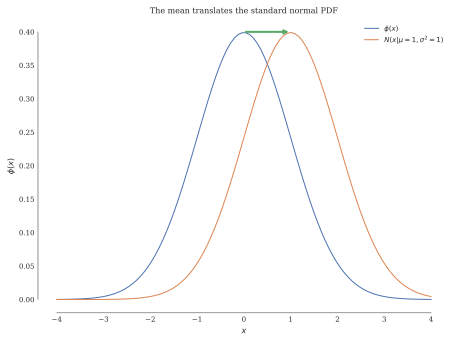

In [11]:
# Plot the PDF of a standard normal and the PDF of a non-zero mean, unit variance normal
# with an arrow indicating the change from the first to the second.
fig, ax = plt.subplots()
zs = np.linspace(-4.0, 4.0, 100)
ax.plot(zs, Z.pdf(zs), label="$\phi(x)$")
ax.plot(zs, st.norm(loc=1.0).pdf(zs), label="$N(x|\mu=1,\sigma^2=1)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$\phi(x)$")
ax.legend(loc="best", frameon=False)
ax.annotate("", xytext=(0.0, 0.4), xy=(1.0, 0.4), arrowprops=dict(arrowstyle="->",
            color=sns.color_palette()[2],
            lw=2))
plt.title("The mean translates the standard normal PDF")
sns.despine(trim=True);


The standard deviation $\sigma$ scales the distribution.

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/775679383.py:4: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(zs, Z.pdf(zs), label="$\phi(x)$")
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/775679383.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(zs, st.norm(loc=0.0, scale=np.sqrt(2.0)).pdf(zs), label="$N(x|\mu=0,\sigma^2=2)$")


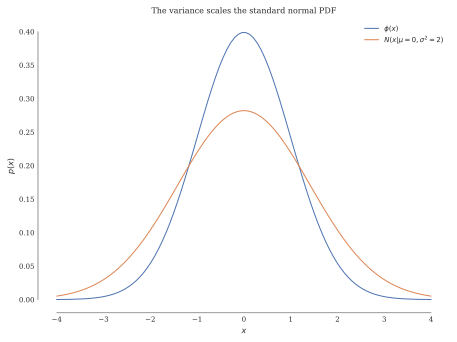

In [12]:
# Plot the PDF of a standard normal and the pdf of a zero mean Normal with variance two
fig, ax = plt.subplots()
zs = np.linspace(-4.0, 4.0, 100)
ax.plot(zs, Z.pdf(zs), label="$\phi(x)$")
ax.plot(zs, st.norm(loc=0.0, scale=np.sqrt(2.0)).pdf(zs), label="$N(x|\mu=0,\sigma^2=2)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
ax.legend(loc="best", frameon=False)
plt.title("The variance scales the standard normal PDF")
sns.despine(trim=True);

(quantiles-normal)=
## Quantiles of the normal

There are a few more exciting things to know about the standard normal.
For example, how can you find a value $z_q$ such that the probability of $Z$ being less than $z_q$ is $q$?
Mathematically, you wish to find this:

$$
\Phi(z_q) = q.
$$

The point $z_q$ is called the $q$-quantile.
To find it, you need to do this:

$$
z_q = \Phi^{-1}(q).
$$

For example, $z_{0.50}$ is called the median (and it coincides with the expectation here).
Another set of exciting quantiles is $z_{0.025}$ and $z_{0.975}$.
Why? Because the probability that $Z$ lies between them is $95$\%.
Here it is:

$$
p(z_{0.025} \le Z \le z_{0.975}) = \Phi(z_{0.975}) - \Phi(z_{0.025}) = 0.975 - 0.025 = 0.95.
$$

Let's find these quantiles and visualize them using the functionality of ``scipy.stats``.
We will use the percent point function (ppf), which the inverse of the CDF:

In [13]:
z_025 = Z.ppf(0.025) 
z_500 = Z.ppf(0.5)
z_975 = Z.ppf(0.975)
print(f"0.025 quantile of Z = {z_025:.2f}")
print(f"0.50 quantile of Z = {z_500:.2f}")
print(f"0.975 quantile of Z = {z_975:.2f}")

0.025 quantile of Z = -1.96
0.50 quantile of Z = 0.00
0.975 quantile of Z = 1.96


Here is how much probability there is between the two extreme quantiles:

In [14]:
print(f"p({z_025:.2f} <= Z <= {z_975:.2f}) = {Z.cdf(z_975) - Z.cdf(z_025):.2f}")

p(-1.96 <= Z <= 1.96) = 0.95


```{note}
Observe that the quantiles are symmetric around the mean (which is zero here).
The 0.025 quantile is at -1.96 and the 0.975 quantile is at 1.96.
Being engineers, we are going to call the -1.96 a two.
```

Let's also visualize the quantiles on top of the PDF:

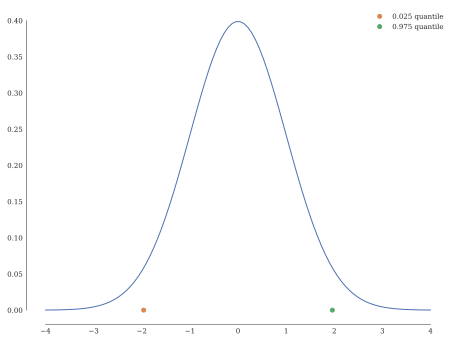

In [15]:
fig, ax = plt.subplots()
ax.plot(zs, Z.pdf(zs))
ax.plot(z_025, [0.0], "o", label="0.025 quantile")
ax.plot(z_975, [0.0], "o", label="0.975 quantile")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

```{note} Quantiles vs percentiles
A percentile is a quantile expressed as a percentage.
So, you say the 0.025 quantile is the 2.5 percentile.
The 0.975 quantile is the 97.5 percentile.
And so on.
```

### Questions

+ Modify the code above so that you find and vizualize $z_{0.001}$ and $z_{0.999}$.
+ What is the difference between $z_{0.999}$ and $z_{0.001}$?
+ What is the probability that $Z$ is between $z_{0.001}$ and $z_{0.999}$?

(any-normal-from-standard-normal)=
## Getting any normal from the standard normal

Knowledge of the quantiles of the standard normal is sufficient to give us the quantiles of any normal.
Let $Z$ be a standard normal.
Take some $\mu$ and $\sigma$.
Then, the random variable

$$
X = \mu + \sigma Z,
$$

follows a $N(\mu,\sigma^2)$.

To show this mathematically, we need to show that the PDF of $X$ is the one we expect.

```{admonition} Proof
First, write down the CDF of $X$:

$$
F_X(x) = p(X \le x) = p(\mu + \sigma Z \le x) = p\left(Z \le \frac{x-\mu}{\sigma}\right) = \Phi\left(\frac{x-\mu}{\sigma}\right).
$$

Now take the derivative of the CDF to get the PDF:

$$
f_X(x) = F'_X(x) = \frac{1}{\sigma}\phi\left(\frac{x-\mu}{\sigma}\right),
$$

which is exactly what we wanted.
```

The formula is extremely useful.
For example, you can use it to make samples from any normal distribution using samples from the standard normal.
Here is how:

In [16]:
mu = 1.0
sigma = 0.1
X = st.norm(mu, sigma)
xs = np.linspace(mu - 6.0 * sigma, mu + 6.0 * sigma, 100)
x_samples = mu + sigma * Z.rvs(size=10000)

Compare the histogram of the samples with the PDF of the normal:

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/1046293625.py:2: SyntaxWarning: invalid escape sequence '\m'
  ax.hist(x_samples, density=True, alpha=0.5, label="Samples from $X = \mu + \sigma Z$")
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68902/1046293625.py:3: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(xs, X.pdf(xs), label="PDF of $N(\mu, \sigma^2)$")


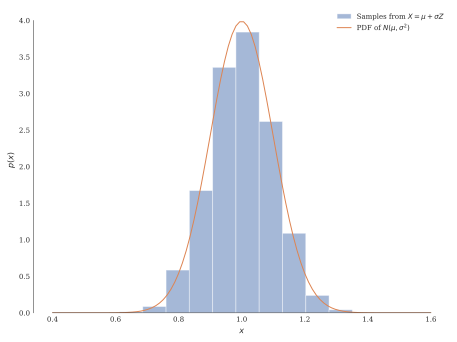

In [17]:
fig, ax = plt.subplots()
ax.hist(x_samples, density=True, alpha=0.5, label="Samples from $X = \mu + \sigma Z$")
ax.plot(xs, X.pdf(xs), label="PDF of $N(\mu, \sigma^2)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

How can you find the quantiles of this normal? Well, you can simply use the functionality of ``scipy.stats``.
As an example, let's find $x_{0.025}$:

In [18]:
x_025 = X.ppf(0.025)
print(f"0.025-quantile of N({mu:.2f}, {sigma:.2f}^2) = {x_025:1.2f}")

0.025-quantile of N(1.00, 0.10^2) = 0.80


But we can also find this quantile by exploiting the connection between $X$ and $Z$.
The definition of a quantile of $X$ is:

$$
p(X \le x_q) = q.
$$

But, since $X=\mu+\sigma Z$, this is equivalent to:

$$
p(\mu + \sigma Z \le x_q) = q,
$$

which becomes:

$$
p(\sigma Z \le x_q-\mu) = q,
$$

and then:

$$
p\left(Z \le \frac{x_q-\mu}{\sigma}\right) = q.
$$

This is just:

$$
\Phi\left(\frac{x_q-\mu}{\sigma}\right) = q,
$$

which tells us that $\frac{x_q-\mu}{\sigma}$ is the $q$-quantile of $Z$, i.e.,

$$
z_q = \frac{x_q-\mu}{\sigma}.
$$

Solving for $x_q$, we get:

$$
x_q = \mu + \sigma z_q.
$$

Let's do a sanity check:

In [19]:
z_025 = Z.ppf(0.025)
print(f"mu + sigma * z_025 = {mu + sigma * z_025:.2f}")

mu + sigma * z_025 = 0.80


which is the same as what we found before. So, let's find also the 0.975-quantile:

In [20]:
z_975 = Z.ppf(0.975)
x_975 = mu + sigma * z_975
print(f"0.975-quantile of N({mu:.2f}, {sigma:.2f}^2) = {x_975:1.2f}")

0.975-quantile of N(1.00, 0.10^2) = 1.20


Let's visualize the quantiles like we did before:

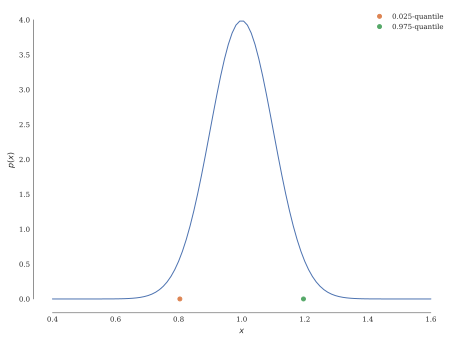

In [21]:
fig, ax = plt.subplots()
ax.plot(xs, X.pdf(xs))
ax.plot(x_025, 0, "o", label="0.025-quantile")
ax.plot(x_975, 0, "o", label="0.975-quantile")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now, let's find the distance between $x_{2.5}$ and $x_{97.5}$ in terms of the standard deviation $\sigma$.
We have:

$$
x_{97.5} - x_{2.5} = \mu + \sigma z_{97.5} - \mu - \sigma z_{2.5} = \sigma (z_{97.5} - z_{2.5}).
$$

This is:

In [22]:
print(f"x_975 - x_025 ~= sigma * {z_975 - z_025:.2f}")

x_975 - x_025 ~= sigma * 3.92


Okay. So we see that 95% of the probability is contained within a $3.92\sigma$ interval.
This interval is centered at the median (which here is the same as the mode and the expectation of the probability density).
The number 3.92 could be nicer, so we will round up to 4 intervals.
A 4$\sigma$ interval about the mean gives us a bit more than 95% of the probability, but it's simpler to remember.

```{note} Remember
For a normal random variable $N(\mu,\sigma^2)$, the 95% probability interval is about $\mu \pm 4\sigma$.
In other words:

$$
p(\mu - 2\sigma < X < \mu + 2 \sigma) \approx 0.95,
$$

```

### Questions

+ Write code that finds exactly how much probability there is between $\mu - 2\sigma$ and $\mu + 2\sigma$, i.e., find $p(\mu - 2\sigma < X < \mu + 2 \sigma)$.
+ Modify the code you just written, to find how much probability there is in $\mu - 3\sigma$ and $\mu + 3\sigma$, i.e., find $p(\mu - 3\sigma < X < \mu + 3 \sigma)$. This is six-sigmas interval about the mean. Have you ever heard of the [six-sigma process improvement technique](https://en.wikipedia.org/wiki/Six_Sigma)?